# ECON 423 Assignment 2

Diana Tsai  
20567329

In [126]:
# Importing necessary packages
import pandas as pd
import numpy as np
import random

import seaborn as sns
import scipy.stats as ss
import pylab as pl
from statsmodels.tsa.arima_model import ARMAResults
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf, acovf
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.ar_model import AR

import matplotlib.pyplot as plt
import matplotlib as mpl

## 4. ACF

In [203]:
# Simulate an ARMA(2, 1) model with phis=[0.8,-0.6] and thetas=[0.5]
def plot_acfARMA(phi1, phi2, theta1):
    max_lag = 20

    n = int(1000) # lots of samples to help estimates

    phis = np.array([phi1,phi2])
    thetas = np.array([theta1])
    ar = np.r_[1, -phis]
    ma = np.r_[1, thetas]

    arma21 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
    arma_acfplt=(tsa.plot_acf(arma21,zero=False,title=
    "ACF Plot of ARMA(2,1) when theta=%s" %(theta1), lags=max_lag))

    mdl = smt.ARMA(arma21, order=(2, 1)).fit(method='mle', trend='nc')
    print(mdl.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 1)   Log Likelihood               -1411.287
Method:                           mle   S.D. of innovations              0.991
Date:                Thu, 08 Nov 2018   AIC                           2830.574
Time:                        01:37:27   BIC                           2850.205
Sample:                             0   HQIC                          2838.035
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8047      0.033     24.742      0.000       0.741       0.868
ar.L2.y       -0.5607      0.031    -18.312      0.000      -0.621      -0.501
ma.L1.y        0.5423      0.035     15.325      0.0

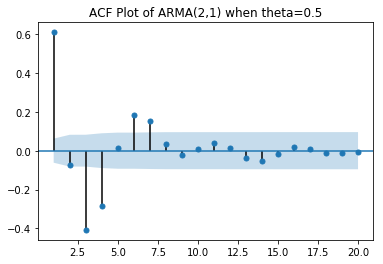

In [204]:
plot_acfARMA(0.8, -0.6, 0.5)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 1)   Log Likelihood               -1433.250
Method:                           mle   S.D. of innovations              1.014
Date:                Thu, 08 Nov 2018   AIC                           2874.500
Time:                        01:37:38   BIC                           2894.131
Sample:                             0   HQIC                          2881.961
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8636      0.044     19.765      0.000       0.778       0.949
ar.L2.y       -0.6295      0.030    -21.218      0.000      -0.688      -0.571
ma.L1.y       -0.0898      0.058     -1.538      0.1

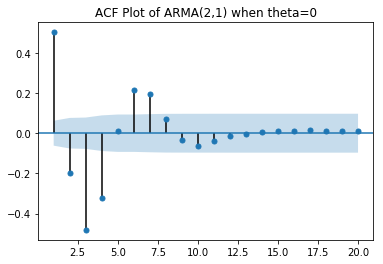

In [205]:
plot_acfARMA(0.8, -0.6, 0)

## 5. Investing in 2 Games

### Part 1

In [228]:
# Game 1
expected_g1=(0.5*-2) + (0.5*10)
var_g1=(0.5*(-2**2))+(0.5*(10**2))-(expected_g1**2)
print("---Game 1---")
print("Expected Return: %s" % (expected_g1))
print("Risk: %s" % (var_g1))

# Game 2
expected_g2=1/6*(sum([1,2,3,4,5,6]))
var_g2=(1/6*(sum([1**1,2**2,3**2,4**2,5**2,6**2])))-(expected_g2**2)
print("")
print("---Game 2---")
print("Expected Return: %s" % (expected_g2))
print("Risk: %s" % (var_g2))

---Game 1---
Expected Return: 4.0
Risk: 32.0

---Game 2---
Expected Return: 3.5
Risk: 2.916666666666666


Text(0,0.5,'Return')

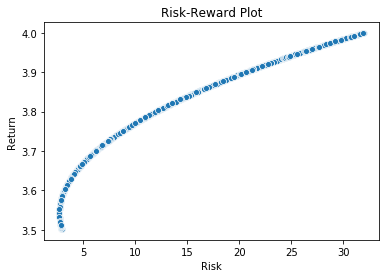

In [6]:
# Plot Risk-Return
return_vector=[]
risk_vector=[]
weight_vector=[]

# add in weights
for i in range(1000):
    w=random.uniform(0,1)
    portfolio_return=w*expected_g1 + (1-w)*expected_g2
    portfolio_variance=(w**2)*var_g1 + ((1-w)**2)*var_g2
    
    return_vector.append(portfolio_return)
    risk_vector.append(portfolio_variance)
    weight_vector.append(w)

scplot = sns.scatterplot(x=risk_vector, y=return_vector)
plt.title("Risk-Reward Plot")
plt.xlabel("Risk")
plt.ylabel("Return")

### Part 2

#### Correlation = -0.2

Text(0,0.5,'Return')

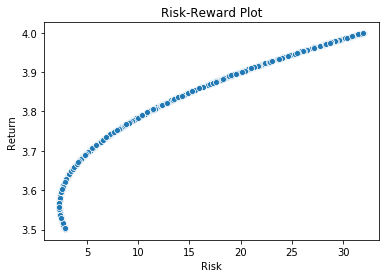

In [7]:
# Covariance of Returns
cov_returns1=(var_g1**(1/2))*(var_g2**(1/2))*-0.2
# Expect no big difference between 0 correlation risk-reward
cov_returns2=(var_g1**(1/2))*(var_g2**(1/2))*0.8
# Expect risk-reward line to be straighter

return_vector2=[]
risk_vector2=[]
weight_vector2=[]

for w2 in range(1000):
    w2=random.uniform(0,1)
    portfolio_return1=w2*expected_g1 + (1-w2)*expected_g2
    portfolio_variance1=(w2**2)*var_g1 +
    ((1-w2)**2)*var_g2 + (2*w2*(1-w2)*cov_returns1)
    
    return_vector2.append(portfolio_return1)
    risk_vector2.append(portfolio_variance1)
    weight_vector2.append(w2)
    
scplot = sns.scatterplot(x=risk_vector2, y=return_vector2)
plt.title("Risk-Reward Plot")
plt.xlabel("Risk")
plt.ylabel("Return")

#### Correlation = 0.8

Text(0,0.5,'Return')

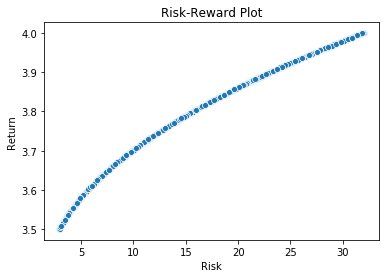

In [8]:
return_vector3=[]
risk_vector3=[]
weight_vector3=[]

for w3 in range(1000):
    w3=random.uniform(0,1)
    portfolio_return2=w3*expected_g1 + (1-w3)*expected_g2
    portfolio_variance2=(w3**2)*var_g1 +
    ((1-w3)**2)*var_g2 + (2*w3*(1-w3)*cov_returns2)
    
    return_vector3.append(portfolio_return2)
    risk_vector3.append(portfolio_variance2)
    weight_vector3.append(w3)
    
scplot = sns.scatterplot(x=risk_vector3, y=return_vector3)
plt.title("Risk-Reward Plot")
plt.xlabel("Risk")
plt.ylabel("Return")

## 6. Simulation AR(1) Model

### Part 1

In [9]:
def simule(mu, sigma_sq, n):
    # note that numpy.random.normal takes standard deviation rather than variance
    diste = np.random.normal(mu, sigma_sq**(1/2), n)
    return diste

epsi = simule(0, 1, 1000)

### Part 2

In [101]:
def arma(phi1, theta1, n):
    # set parameters
    phis = np.array(phi1)
    thetas = np.array(theta1)
    
    # create the AR and MA parts of ARMA
    ar = np.r_[1, -phis]
    ma = np.r_[1, thetas]

    model = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
    return model

ar1 = arma([0.88], [0], 1000)

### Part 3

In [102]:
ar1_mean = np.mean(ar1)
ar1_var = np.var(ar1)
ar1_autocorr = acovf(ar1)
ar1_acf = acf(ar1)
print(ar1_mean)
print(ar1_var)
print(ar1_autocorr[:6])
print(ar1_acf[:6])

0.23834840934856344
4.592875711391518
[4.59287571 4.05854964 3.56823694 3.1394343  2.69748018 2.34457479]
[1.         0.88366198 0.77690692 0.68354436 0.58731835 0.51048078]


Part 4 is written on paper.

## 7. MA(1) Model

### Part 2

In [103]:
ma1 = arma([0], [0.88], 1000)

### Part 3

In [104]:
ma1_mean = np.mean(ma1)
ma1_var = np.var(ma1)
ma1_autocorr = acovf(ma1)
ma1_acf = acf(ma1)
print(ma1_mean)
print(ma1_var)
print(ma1_autocorr[:6])
print(ma1_acf[:6])

0.048165130939038334
1.9521481817988273
[ 1.95214818e+00  9.34299360e-01 -4.94672207e-02 -1.51044934e-03
 -1.45503472e-02  3.20629319e-03]
[ 1.00000000e+00  4.78600635e-01 -2.53398903e-02 -7.73737033e-04
 -7.45350549e-03  1.64244355e-03]


Part 4 is written on paper.

## 8. Apply AR to Real Life Data

### Part 1 and Part 2

In [14]:
# Import .csv files
# Coke
coke = pd.read_csv("C:/Users/Diana/Documents/University of Waterloo/" + \
                   "4th Year/ECON 423/COKE.csv")

In [172]:
coke["Return"] = 100*(np.log(coke["Adj Close"]) - \
                        np.log(coke["Adj Close"].shift(1)))
coke = coke.iloc[1:]
coke_train=coke["Return"][:-5]
coke_test=coke["Return"][-5:]

In [185]:
# AR(1)
model1 = smt.ARMA(coke_train, order=(1,0))
model_fit1 = model1.fit(disp=0)
print(model_fit1.summary())

ar1_mean2=np.mean(model_fit1.resid)
ar1_var2=np.var(model_fit1.resid)
ar1_skew2=ss.skew(model_fit1.resid)
ar1_kurt2=ss.kurtosis(model_fit1.resid)
print("Mean: %s" %(ar1_mean2))
print("Variance: %s" %(ar1_var2))
print("Skewness: %s" %(ar1_skew2))
print("Kurtosis: %s" %(ar1_kurt2))

                              ARMA Model Results                              
Dep. Variable:                 Return   No. Observations:                 4520
Model:                     ARMA(1, 0)   Log Likelihood               -9378.942
Method:                       css-mle   S.D. of innovations              1.927
Date:                Thu, 08 Nov 2018   AIC                          18763.885
Time:                        01:20:39   BIC                          18783.134
Sample:                             0   HQIC                         18770.666
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0395      0.027      1.480      0.139      -0.013       0.092
ar.L1.Return    -0.0730      0.015     -4.918      0.000      -0.102      -0.044
                                    Roots   

In [186]:
# AR(2)
model2 = smt.ARMA(coke_train, order=(2,0))
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())

ar2_mean=np.mean(model_fit2.resid)
ar2_var=np.var(model_fit2.resid)
ar2_skew=ss.skew(model_fit2.resid)
ar2_kurt=ss.kurtosis(model_fit2.resid)
print("Mean: %s" %(ar2_mean))
print("Variance: %s" %(ar2_var))
print("Skewness: %s" %(ar2_skew))
print("Kurtosis: %s" %(ar2_kurt))

                              ARMA Model Results                              
Dep. Variable:                 Return   No. Observations:                 4520
Model:                     ARMA(2, 0)   Log Likelihood               -9376.641
Method:                       css-mle   S.D. of innovations              1.926
Date:                Thu, 08 Nov 2018   AIC                          18761.282
Time:                        01:21:26   BIC                          18786.947
Sample:                             0   HQIC                         18770.323
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0395      0.026      1.528      0.127      -0.011       0.090
ar.L1.Return    -0.0753      0.015     -5.064      0.000      -0.104      -0.046
ar.L2.Return    -0.0319      0.015     -2.14

In [187]:
# AR(3)
model3 = smt.ARMA(coke_train, order=(3,0))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())

ar3_mean=np.mean(model_fit3.resid)
ar3_var=np.var(model_fit3.resid)
ar3_skew=ss.skew(model_fit3.resid)
ar3_kurt=ss.kurtosis(model_fit3.resid)
print("Mean: %s" %(ar3_mean))
print("Variance: %s" %(ar3_var))
print("Skewness: %s" %(ar3_skew))
print("Kurtosis: %s" %(ar3_kurt))

                              ARMA Model Results                              
Dep. Variable:                 Return   No. Observations:                 4520
Model:                     ARMA(3, 0)   Log Likelihood               -9376.178
Method:                       css-mle   S.D. of innovations              1.926
Date:                Thu, 08 Nov 2018   AIC                          18762.356
Time:                        01:21:37   BIC                          18794.437
Sample:                             0   HQIC                         18773.658
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0395      0.026      1.506      0.132      -0.012       0.091
ar.L1.Return    -0.0748      0.015     -5.032      0.000      -0.104      -0.046
ar.L2.Return    -0.0308      0.015     -2.06

In [188]:
# AR(4)
model4 = smt.ARMA(coke_train, order=(4,0))
model_fit4 = model4.fit(disp=0)
print(model_fit4.summary())

ar4_mean=np.mean(model_fit4.resid)
ar4_var=np.var(model_fit4.resid)
ar4_skew=ss.skew(model_fit4.resid)
ar4_kurt=ss.kurtosis(model_fit4.resid)
print("Mean: %s" %(ar4_mean))
print("Variance: %s" %(ar4_var))
print("Skewness: %s" %(ar4_skew))
print("Kurtosis: %s" %(ar4_kurt))

                              ARMA Model Results                              
Dep. Variable:                 Return   No. Observations:                 4520
Model:                     ARMA(4, 0)   Log Likelihood               -9375.531
Method:                       css-mle   S.D. of innovations              1.926
Date:                Thu, 08 Nov 2018   AIC                          18763.061
Time:                        01:21:45   BIC                          18801.559
Sample:                             0   HQIC                         18776.623
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0395      0.027      1.481      0.139      -0.013       0.092
ar.L1.Return    -0.0751      0.015     -5.048      0.000      -0.104      -0.046
ar.L2.Return    -0.0303      0.015     -2.03

In [189]:
# AR(5)
model5 = smt.ARMA(coke_train, order=(5,0))
model_fit5 = model5.fit(disp=0)
print(model_fit5.summary())

ar5_mean=np.mean(model_fit5.resid)
ar5_var=np.var(model_fit5.resid)
ar5_skew=ss.skew(model_fit5.resid)
ar5_kurt=ss.kurtosis(model_fit5.resid)
print("Mean: %s" %(ar5_mean))
print("Variance: %s" %(ar5_var))
print("Skewness: %s" %(ar5_skew))
print("Kurtosis: %s" %(ar5_kurt))

                              ARMA Model Results                              
Dep. Variable:                 Return   No. Observations:                 4520
Model:                     ARMA(5, 0)   Log Likelihood               -9373.647
Method:                       css-mle   S.D. of innovations              1.925
Date:                Thu, 08 Nov 2018   AIC                          18761.293
Time:                        01:21:56   BIC                          18806.207
Sample:                             0   HQIC                         18777.116
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0395      0.026      1.524      0.128      -0.011       0.090
ar.L1.Return    -0.0746      0.015     -5.017      0.000      -0.104      -0.045
ar.L2.Return    -0.0299      0.015     -2.00

In [202]:
print("Models    ||  AR(1)   |  AR(2)  |  AR(3)  |  AR(4)  | AR(5)")
print("=============================================================")
print("Mean      || %.4f  | %.4f | %.4f | %.4f | %.4f" %(ar1_mean2, ar2_mean, ar3_mean, ar4_mean, ar5_mean))
print("Variance  || %.4f   | %.4f  | %.4f  | %.4f  | %.4f" %(ar1_var2, ar2_var, ar3_var, ar4_var, ar5_var))
print("Skewness  || %.4f  | %.4f | %.4f | %.4f | %.4f" %(ar1_skew2, ar2_skew, ar3_skew, ar4_skew, ar5_skew))
print("Kurtosis  || %.4f   | %.4f  | %.4f  | %.4f  | %.4f" %(ar1_kurt2, ar2_kurt, ar3_kurt, ar4_kurt, ar5_kurt))

Models    ||  AR(1)   |  AR(2)  |  AR(3)  |  AR(4)  | AR(5)
Mean      || -0.0000  | -0.0000 | -0.0000 | -0.0000 | -0.0001
Variance  || 3.7140   | 3.7102  | 3.7094  | 3.7084  | 3.7053
Skewness  || -0.1045  | -0.1112 | -0.1080 | -0.1088 | -0.1123
Kurtosis  || 7.3636   | 7.2750  | 7.2895  | 7.3045  | 7.2420


AR(5) because it's mean is the same as the other ones, variance is high but lower than the other AR processes, skewness is not the highest and the kurtosis is closer to 3. 

### Part 3

In [226]:
# Static
N = len(coke_train)
print("AR(1) forecast")
print(model_fit1.predict(N, N+4))
print("AR(2) forecast")
print(model_fit2.predict(N, N+4))
print("AR(3) forecast")
print(model_fit3.predict(N, N+4))
print("AR(4) forecast")
print(model_fit4.predict(N, N+4))
print("AR(5) forecast")
print(model_fit5.predict(N, N+4))
print("Actual")
print(coke_test)

AR(1) forecast
4523   -0.006259
4524    0.042877
4525    0.039292
4526    0.039553
4527    0.039534
dtype: float64
AR(2) forecast
4523   -0.009749
4524    0.023232
4525    0.042345
4526    0.039854
4527    0.039432
dtype: float64
AR(3) forecast
4523   -0.024496
4524    0.025901
4525    0.051517
4526    0.038150
4527    0.039082
dtype: float64
AR(4) forecast
4523   -0.039987
4524    0.009618
4525    0.055045
4526    0.048659
4527    0.036567
dtype: float64
AR(5) forecast
4523   -0.160798
4524    0.045027
4525    0.085749
4526    0.040389
4527    0.017085
dtype: float64
Actual
4523   -0.937156
4524   -1.502422
4525    0.392528
4526   -1.232973
4527   -0.726706
Name: Return, dtype: float64
